In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix
import joblib

In [3]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Weatherset/weather.csv')
print(df)

Mounted at /content/drive
            date  precipitation  temp_max  temp_min  wind  weather
0     2012-01-01            0.0      12.8       5.0   4.7  drizzle
1     2012-01-02           10.9      10.6       2.8   4.5     rain
2     2012-01-03            0.8      11.7       7.2   2.3     rain
3     2012-01-04           20.3      12.2       5.6   4.7     rain
4     2012-01-05            1.3       8.9       2.8   6.1     rain
...          ...            ...       ...       ...   ...      ...
1456  2015-12-27            8.6       4.4       1.7   2.9     rain
1457  2015-12-28            1.5       5.0       1.7   1.3     rain
1458  2015-12-29            0.0       7.2       0.6   2.6      fog
1459  2015-12-30            0.0       5.6      -1.0   3.4      sun
1460  2015-12-31            0.0       5.6      -2.1   3.5      sun

[1461 rows x 6 columns]


In [4]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [5]:
#Fill missing values
df.fillna(df.mean(numeric_only=True), inplace=True)

In [6]:
#Encode terger vaiable
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['weather_encoded'] = le.fit_transform(df['weather'])

In [ ]:
#Exploratory Data Analysis (EDA)

In [22]:
col_name = df.columns
col_name

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather',
       'weather_encoded'],
      dtype='object')

In [23]:
# unique values
df.nunique()

,0
date,1461
precipitation,111
temp_max,67
temp_min,55
wind,79
weather,5
weather_encoded,5


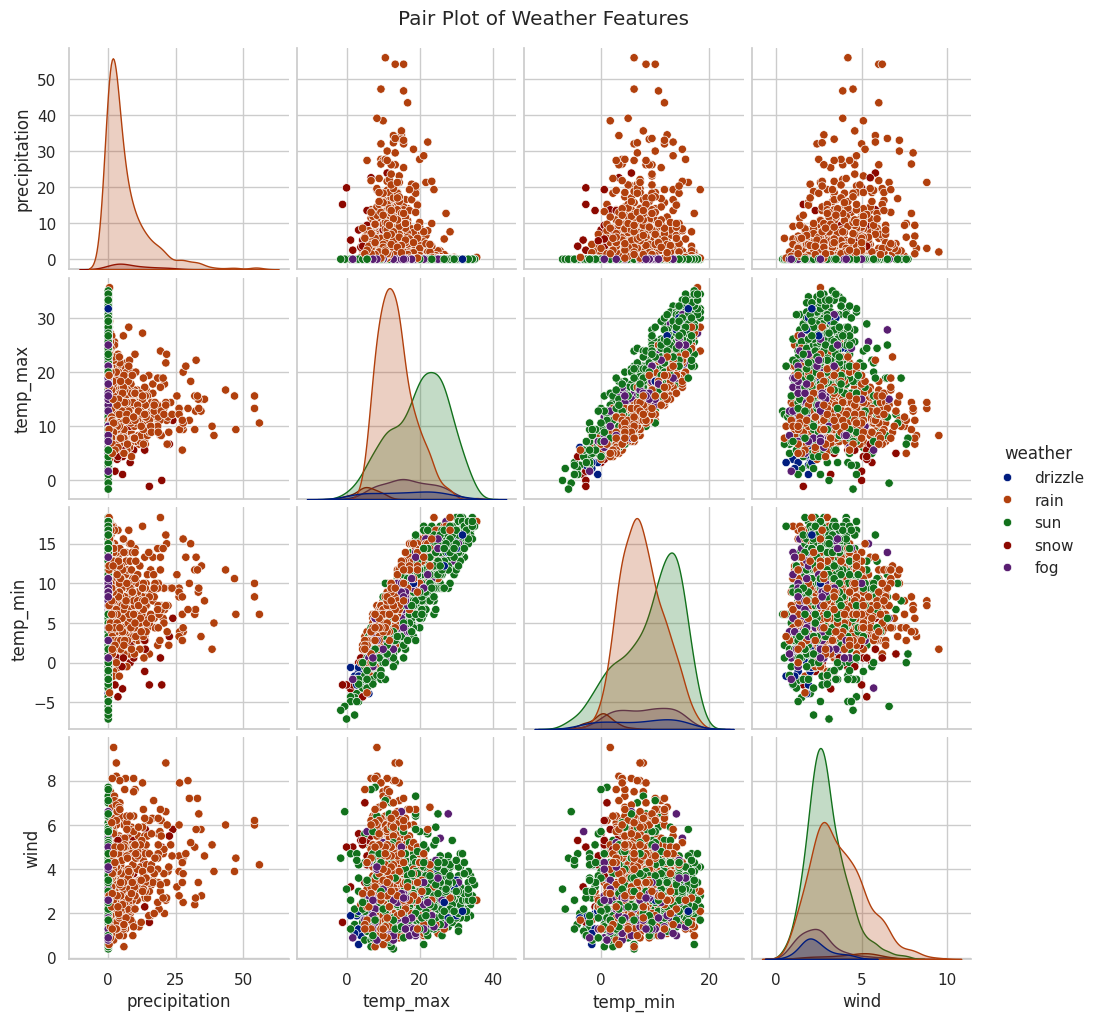

In [24]:
# Pairplot with weather category
sns.pairplot(
    data=df,
    vars=['precipitation','temp_max','temp_min','wind'],
    hue='weather',
    palette='dark'
)

plt.suptitle("Pair Plot of Weather Features", y=1.02)
plt.show()

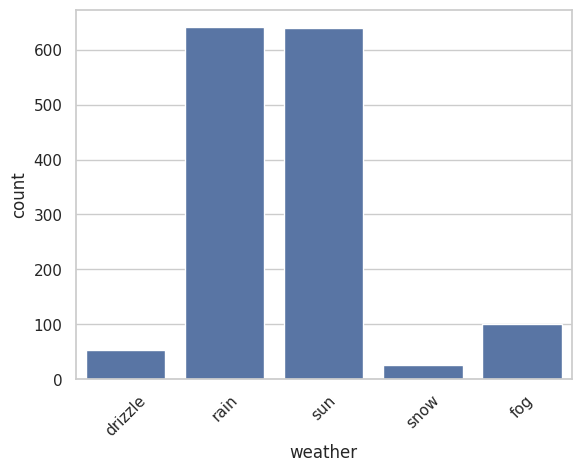

In [7]:
#Distribution pf weather types
sns.countplot(x='weather', data=df)
plt.xticks(rotation=45)
plt.show()

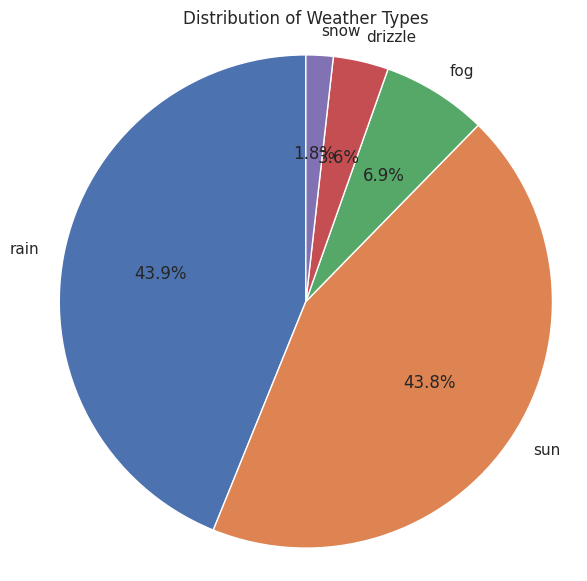

In [25]:
# Count each weather type
weather_counts = df['weather'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(
    weather_counts,
    labels=weather_counts.index,
    autopct='%1.1f%%',
    startangle=90
)

plt.title("Distribution of Weather Types")
plt.axis('equal')
plt.show()

/tmp/ipython-input-463/1259152654.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)
/tmp/ipython-input-463/1259152654.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)


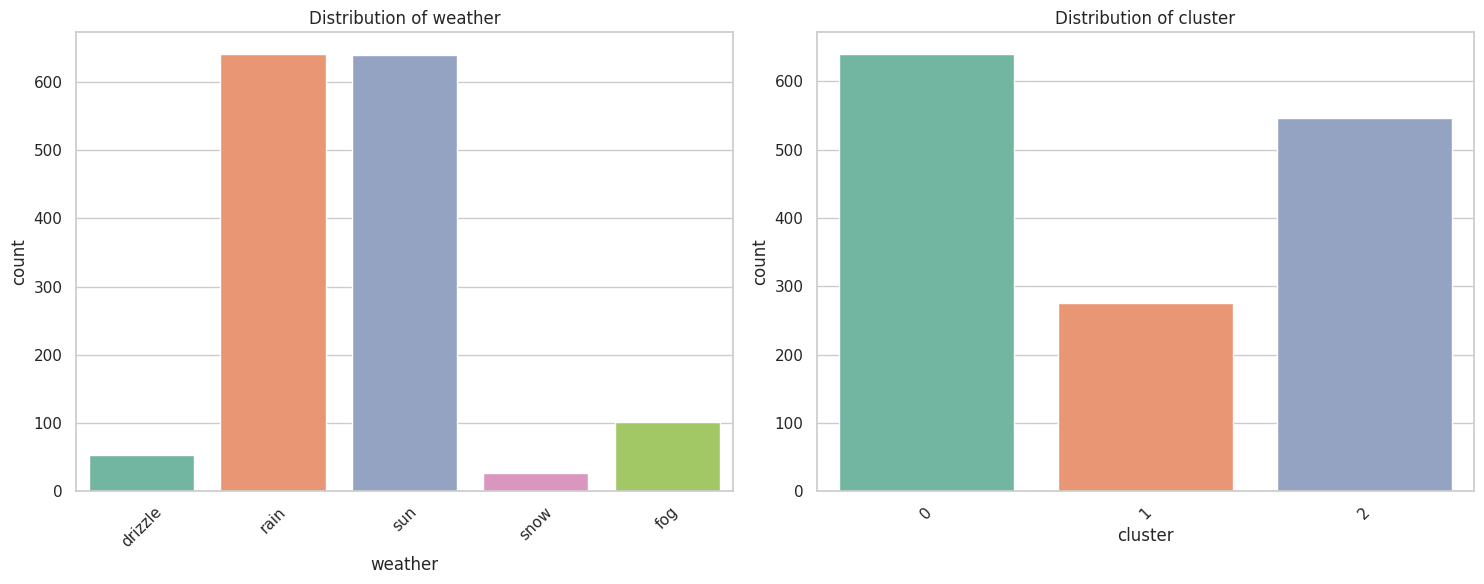

In [29]:
df['cluster'] = clusters

cat_cols = ['weather', 'cluster']   # categorical columns

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
axs = axs.flatten()

for i, var in enumerate(cat_cols):
    sns.countplot(x=var, data=df, ax=axs[i], hue=var, palette='Set2', legend=False)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)
    axs[i].set_title(f"Distribution of {var}")

fig.tight_layout()
plt.show()

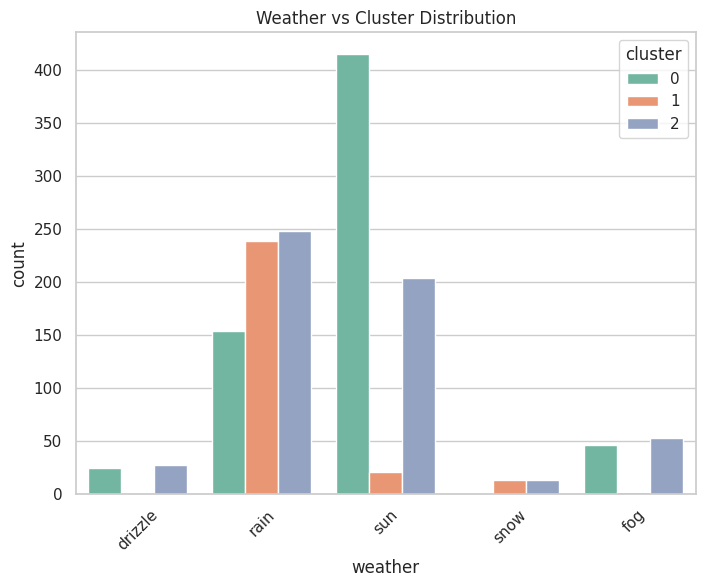

In [30]:
#Weather vs cluster
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8,6))

sns.countplot(
    x='weather',
    hue='cluster',
    data=df,
    palette='Set2'
)

plt.xticks(rotation=45)
plt.title("Weather vs Cluster Distribution")
plt.show()

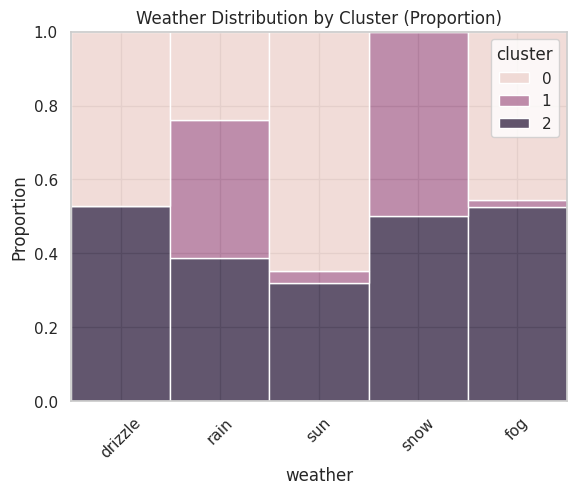

In [31]:
#Weather Type Distribution by Cluster (Percentage Fill)

sns.histplot(
    x='weather',
    hue='cluster',
    data=df,
    multiple='fill',   # percentage depends
    kde=False,
    element='bars'
)

plt.xticks(rotation=45)
plt.title("Weather Distribution by Cluster (Proportion)")
plt.ylabel("Proportion")
plt.show()

/tmp/ipython-input-463/2369232016.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)
/tmp/ipython-input-463/2369232016.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)
/tmp/ipython-input-463/2369232016.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)


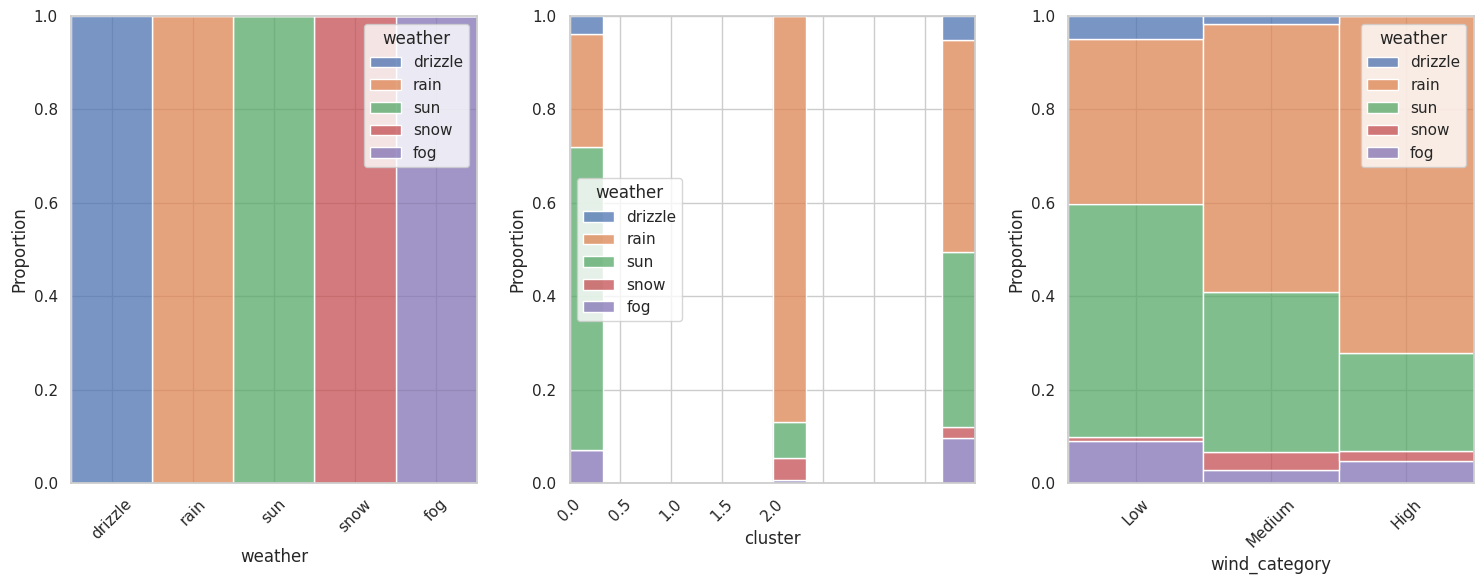

In [33]:
#Wind category and histogram loop
df['wind_category'] = pd.cut(
    df['wind'],
    bins=3,
    labels=['Low','Medium','High']
)
cat_cols = ['weather', 'cluster', 'wind_category']

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,6))
axs = axs.flatten()

for i, var in enumerate(cat_cols):
    sns.histplot(
        x=var,
        hue='weather',
        data=df,
        ax=axs[i],
        multiple='fill',   # percentage style
        kde=False,
        element='bars'
    )

    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)
    axs[i].set_xlabel(var)
    axs[i].set_ylabel("Proportion")

fig.tight_layout()
plt.show()

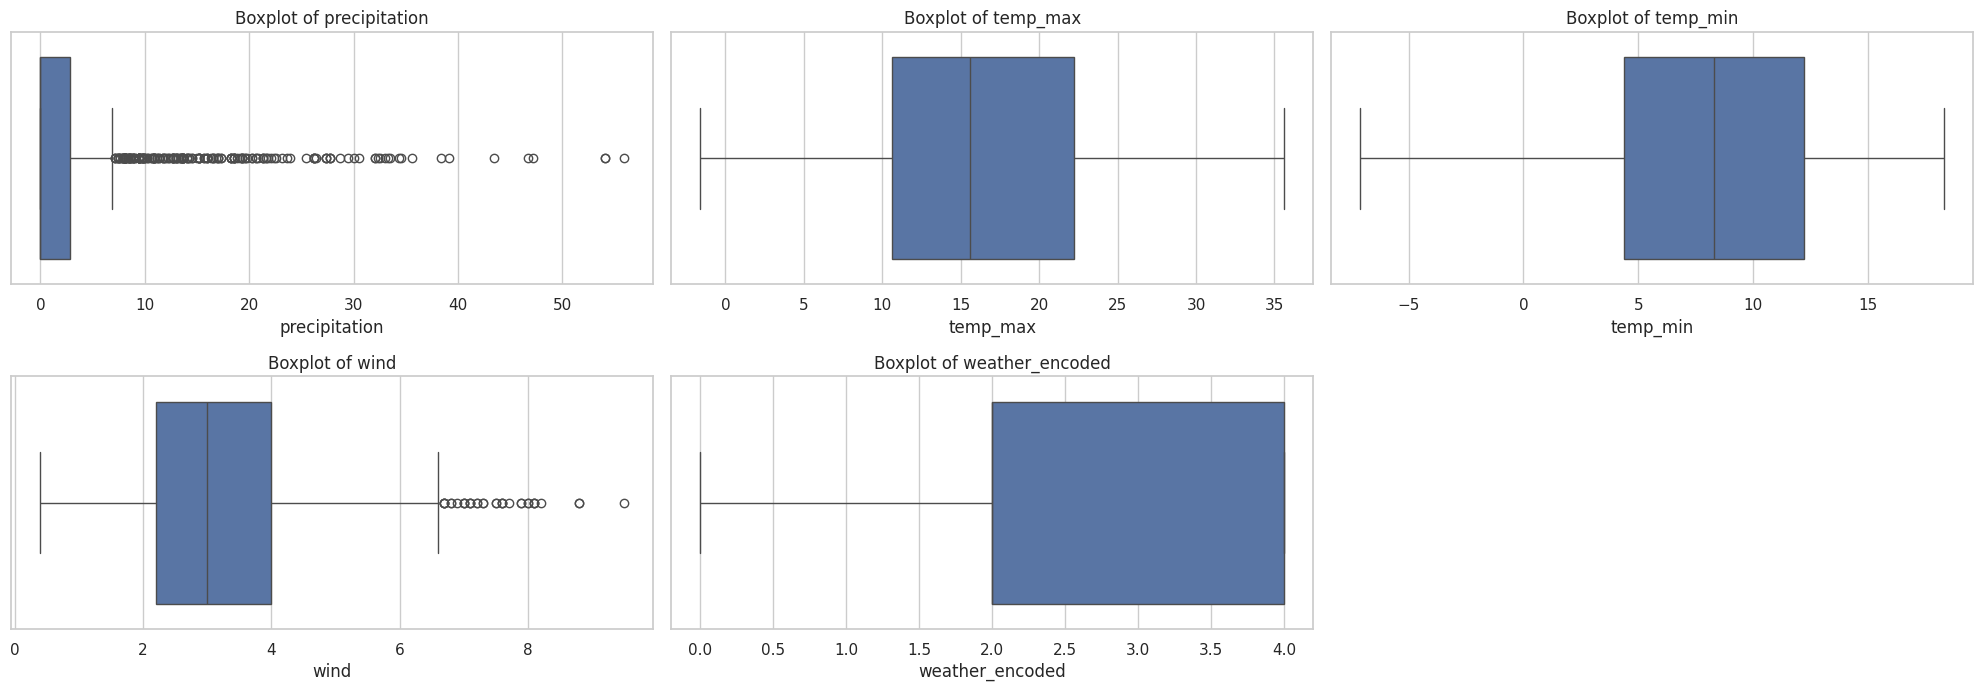

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = df.select_dtypes(include=['int64','float64']).columns

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20,10))
axs = axs.flatten()

for i, var in enumerate(num_cols):
    sns.boxplot(x=var, data=df, ax=axs[i])
    axs[i].set_title(f"Boxplot of {var}")

for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

fig.tight_layout()
plt.show()

/tmp/ipython-input-463/2971749.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)
/tmp/ipython-input-463/2971749.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)
/tmp/ipython-input-463/2971749.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)
/tmp/ipython-input-463/2971749.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)
/tmp/ipython-input-463/2971749.py:17: UserWarning: set_ticklabels() should only 

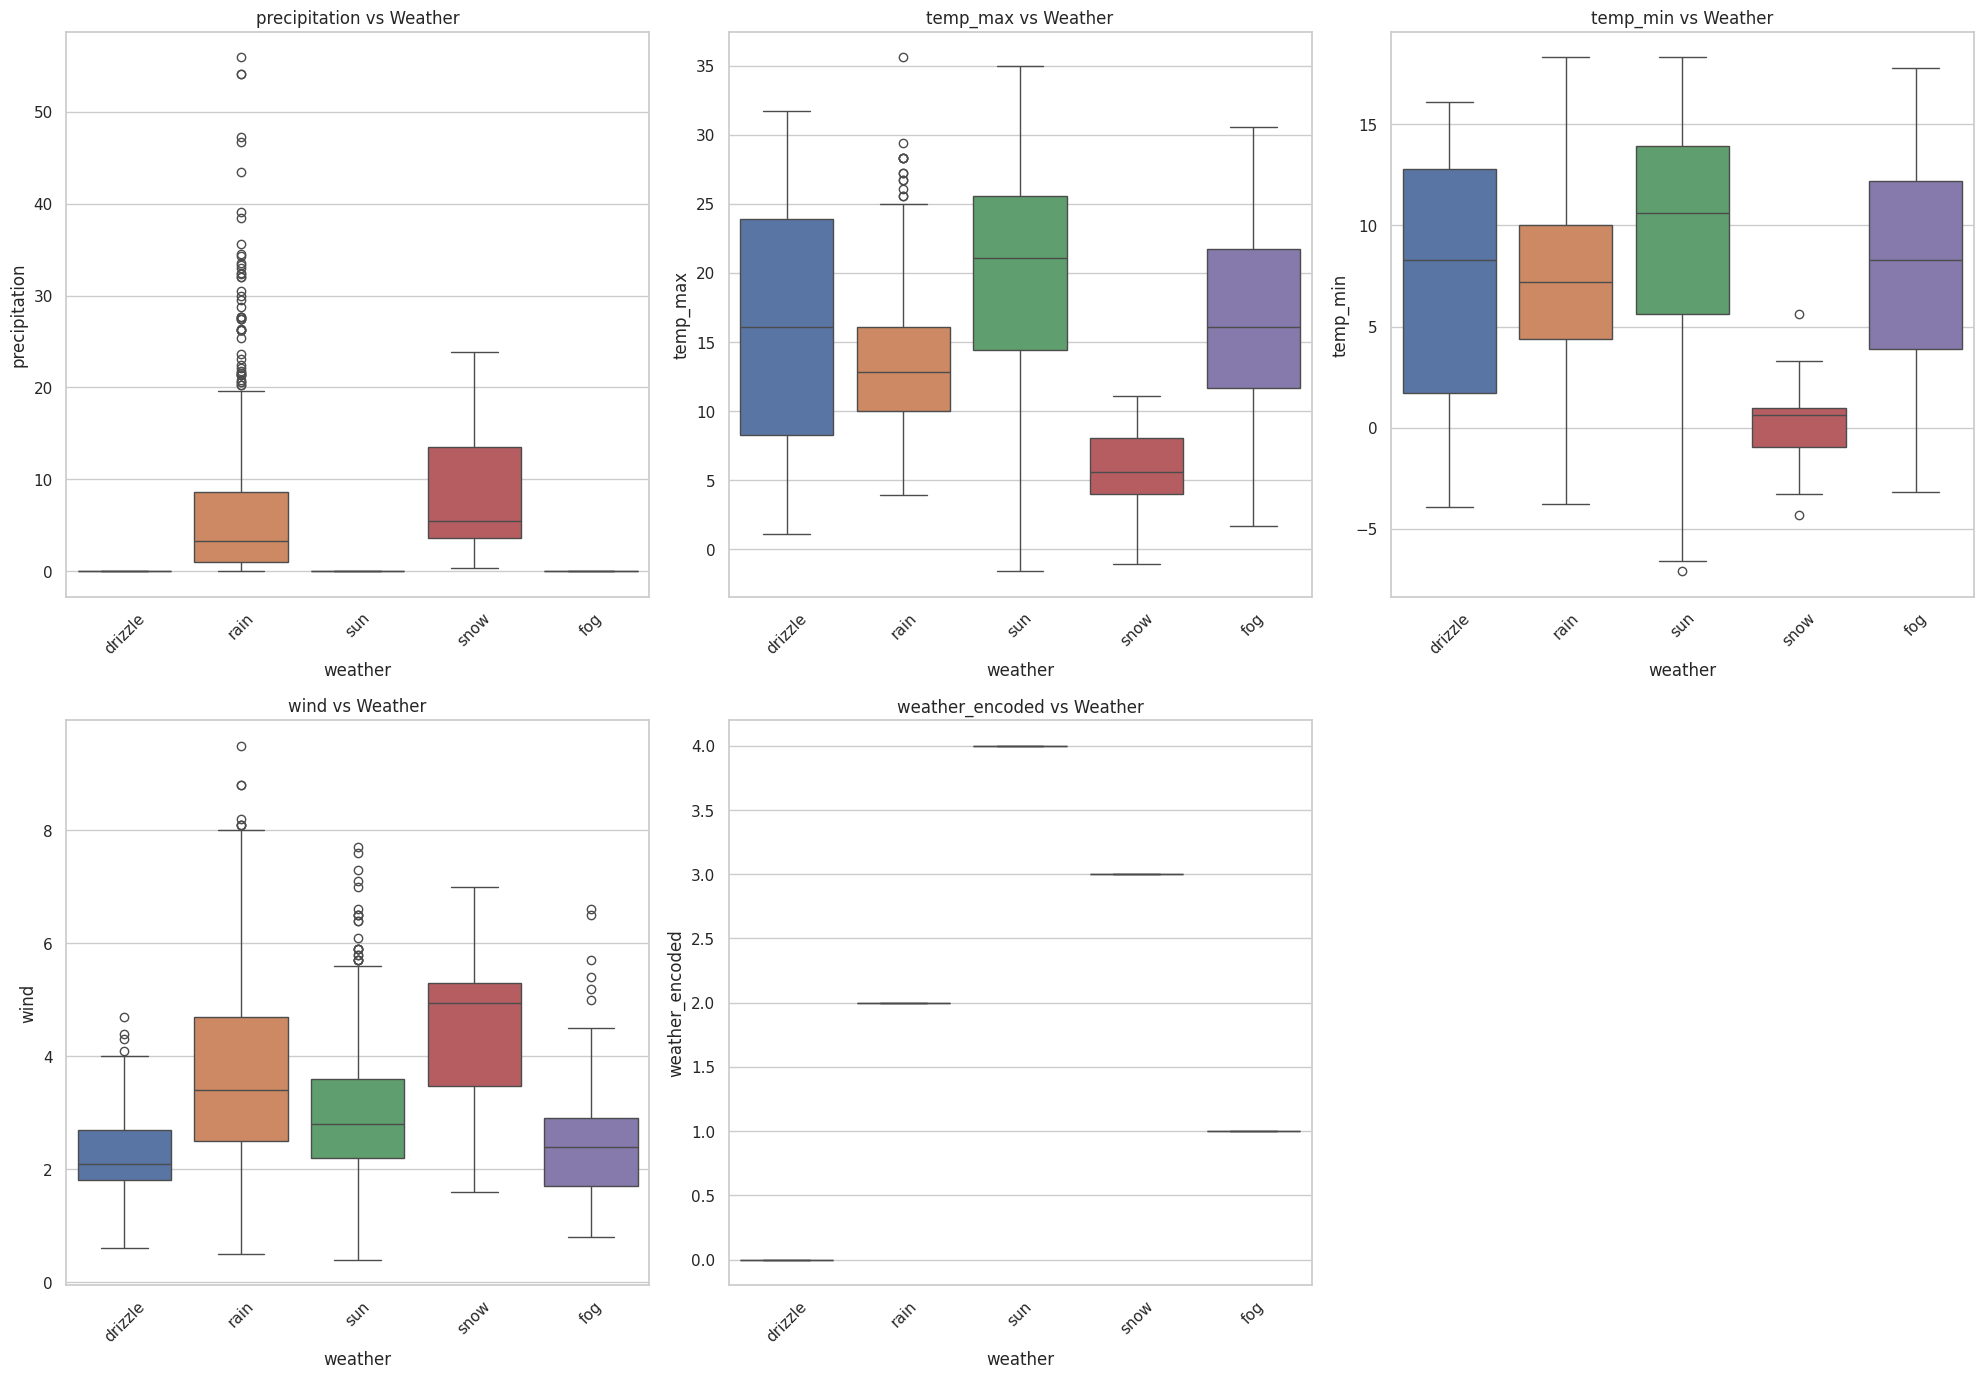

In [36]:
#Boxlplot of Numerical features vs weather

num_cols = df.select_dtypes(include=['int64','float64']).columns

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
axs = axs.flatten()

for i, var in enumerate(num_cols):
    sns.boxplot(
        y=var,
        x='weather',
        hue='weather',
        data=df,
        ax=axs[i],
        legend=False   # বারবার legend না দেখানোর জন্য
    )
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)
    axs[i].set_title(f"{var} vs Weather")

# extra subplot থাকলে remove
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

fig.tight_layout()
plt.show()

In [37]:
#Wind level category
df['wind_level'] = pd.cut(
    df['wind'],
    bins=3,
    labels=['Low','Medium','High']
)

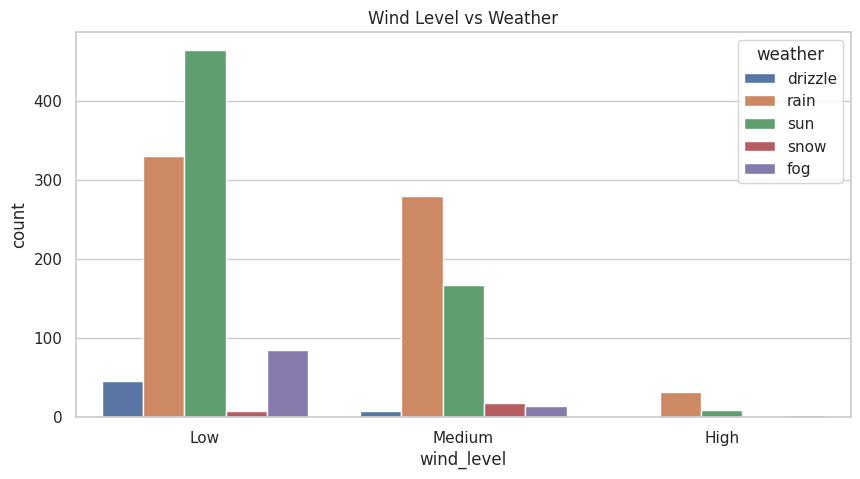

In [38]:
#count plot
plt.figure(figsize=(10,5))

sns.countplot(
    x='wind_level',
    hue='weather',
    data=df
)

plt.title("Wind Level vs Weather")
plt.show()

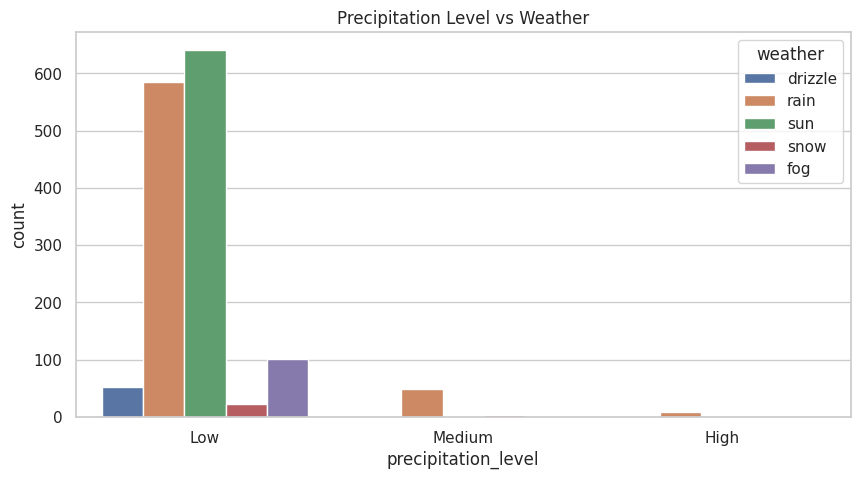

In [39]:
#Precipitation Level vs Weather
df['precipitation_level'] = pd.cut(
    df['precipitation'],
    bins=3,
    labels=['Low','Medium','High']
)

plt.figure(figsize=(10,5))

sns.countplot(
    x='precipitation_level',
    hue='weather',
    data=df
)

plt.title("Precipitation Level vs Weather")
plt.show()

In [40]:
#Wind category
df['wind_level'] = pd.cut(
    df['wind'],
    bins=3,
    labels=['Low','Medium','High']
)

/tmp/ipython-input-463/3598244552.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(


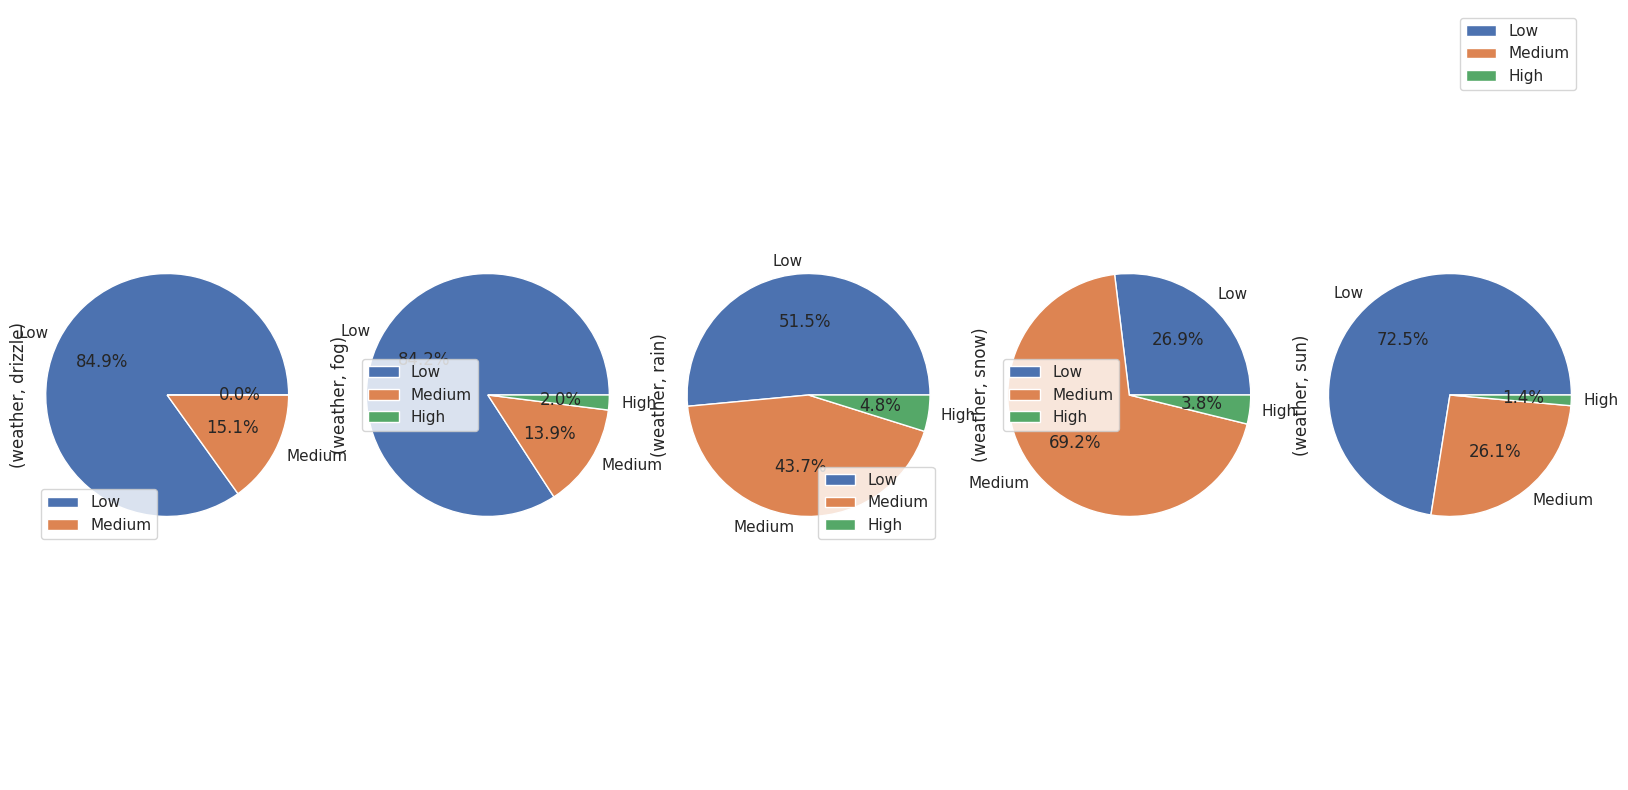

In [41]:
#pivot & pie
df.pivot_table(
    index='wind_level',
    columns='weather',
    aggfunc={'weather':'count'}
).plot.pie(
    autopct='%1.1f%%',
    subplots=True,
    figsize=(20,10)
)

plt.axis('equal')
plt.show()

/tmp/ipython-input-463/331863608.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(


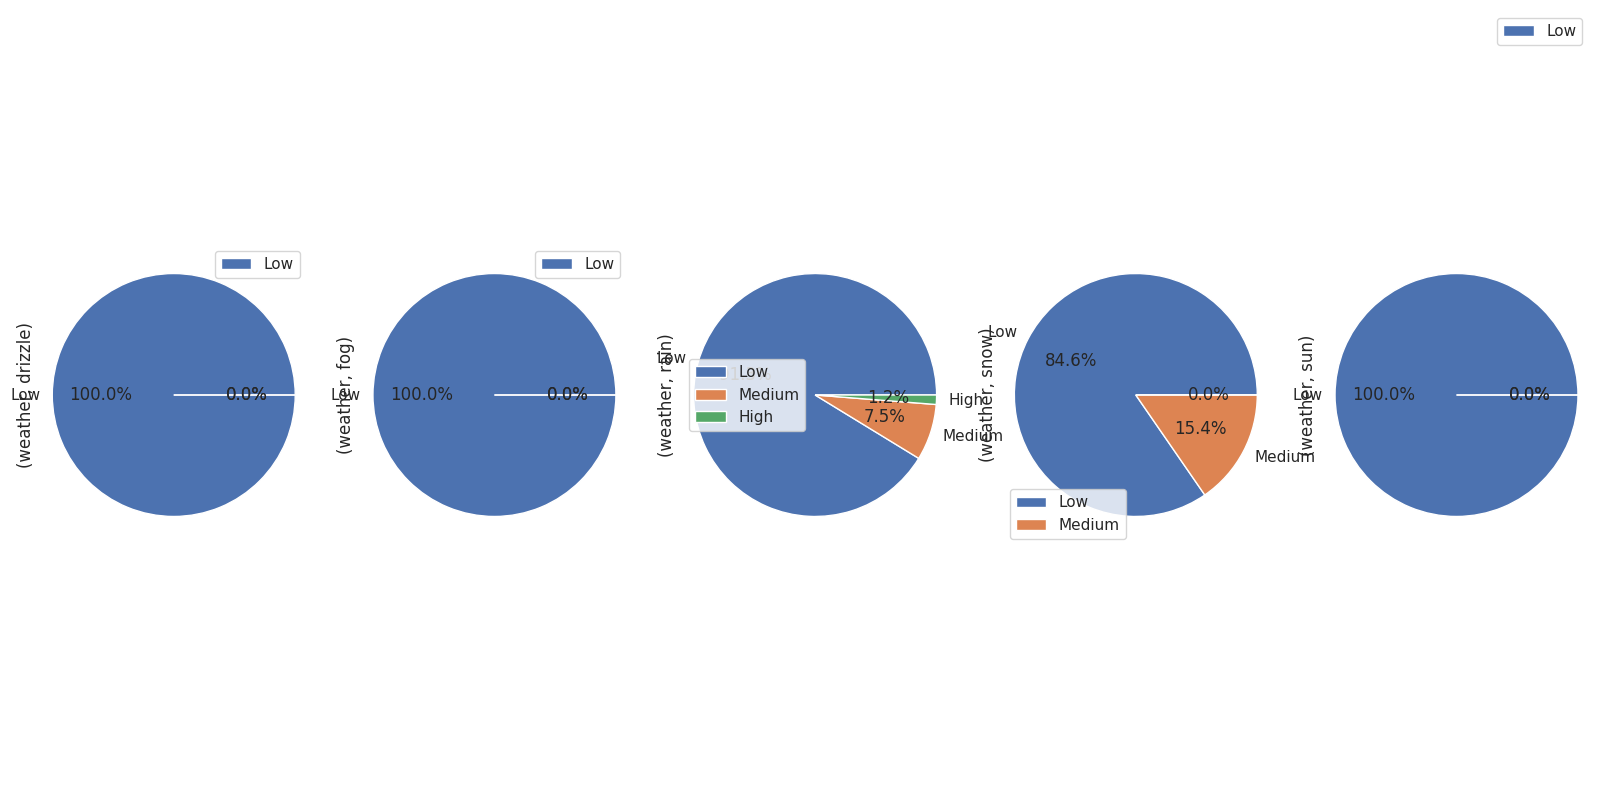

In [42]:
#Precipitation Level vs Weather
df['precipitation_level'] = pd.cut(
    df['precipitation'],
    bins=3,
    labels=['Low','Medium','High']
)

df.pivot_table(
    index='precipitation_level',
    columns='weather',
    aggfunc={'weather':'count'}
).plot.pie(
    autopct='%1.1f%%',
    subplots=True,
    figsize=(20,10)
)

plt.axis('equal')
plt.show()

In [ ]:
# Data processing

In [43]:
df.isnull().sum()

,0
date,0
precipitation,0
temp_max,0
temp_min,0
wind,0
weather,0
weather_encoded,0
cluster,0
wind_category,0
wind_level,0


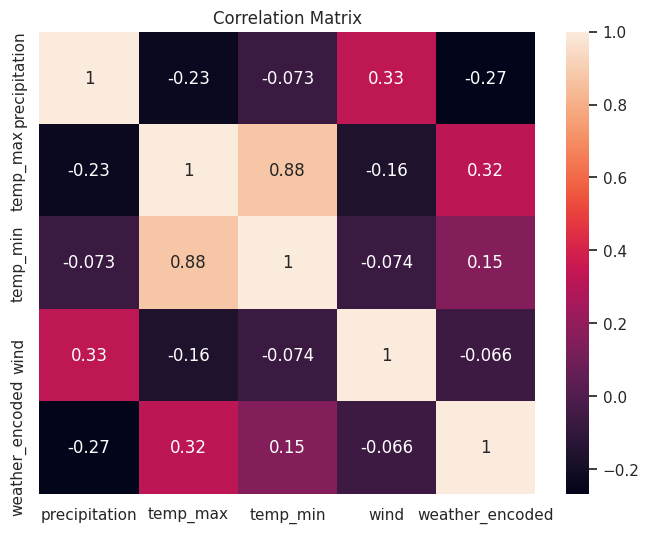

In [8]:
#correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title("Correlation Matrix")
plt.show()

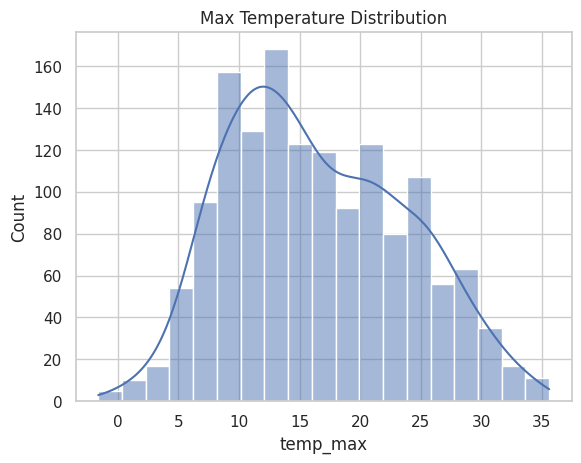

In [9]:
#Temperature distribution
sns.histplot(df['temp_max'], kde=True)
plt.title("Max Temperature Distribution")
plt.show()

In [11]:
#Feature selection
features = ['precipitation', 'temp_max', 'temp_min', 'wind']
X = df[features]
y = df['weather_encoded']

In [12]:
#Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
#Model training

In [13]:
#Logistic regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8327645051194539

In [14]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
dtree.score(X_test, y_test)

0.7303754266211604

In [15]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8156996587030717

In [16]:
# Model Evaluation Function
from sklearn.metrics import accuracy_score, f1_score

def model_accuracy(model, model_name):
    y_pred = model.predict(X_test)
    print(f"---- {model_name} ----")
    print("Accuracy:", round(accuracy_score(y_test, y_pred)*100,2),"%")
    print("F1 Score:", round(f1_score(y_test, y_pred, average='micro'),2))

In [17]:
model_accuracy(dtree, "Decision Tree")
model_accuracy(rf, "Random Forest")
model_accuracy(lr, "Logistic Regression")

---- Decision Tree ----
Accuracy: 73.04 %
F1 Score: 0.73
---- Random Forest ----
Accuracy: 81.57 %
F1 Score: 0.82
---- Logistic Regression ----
Accuracy: 83.28 %
F1 Score: 0.83


/tmp/ipython-input-463/206444075.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=imp_df, x='importance', y='Feature name', palette='viridis')


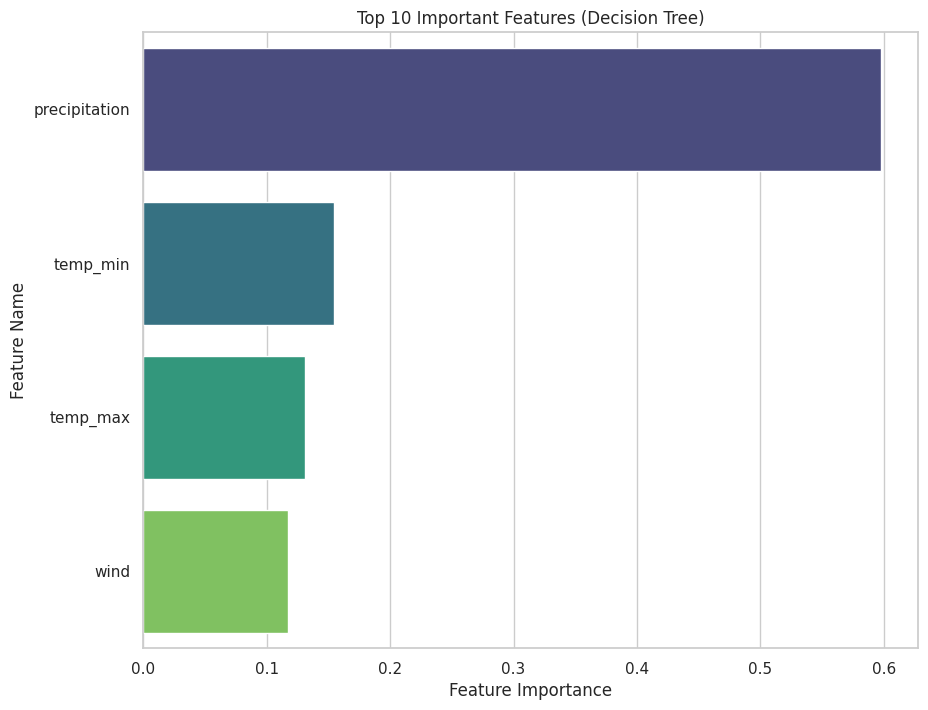

In [45]:
#Weather Project – Top 10 Feature Importance (Decision Tree)

imp_df = pd.DataFrame({
    'Feature name': X_train.columns,
    'importance': dtree.feature_importances_
}).sort_values(by='importance', ascending=False).head(10)

plt.figure(figsize=(10,8))
sns.barplot(data=imp_df, x='importance', y='Feature name', palette='viridis')

plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Top 10 Important Features (Decision Tree)')
plt.show()

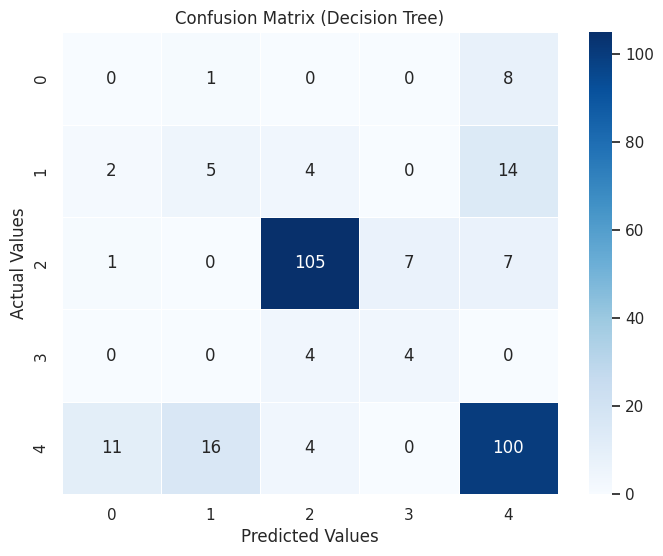

In [47]:
#confusion matrix

y_pred = dtree.predict(X_test)   # Decision Tree prediction

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', linewidths=.5, cmap="Blues")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix (Decision Tree)')
plt.show()

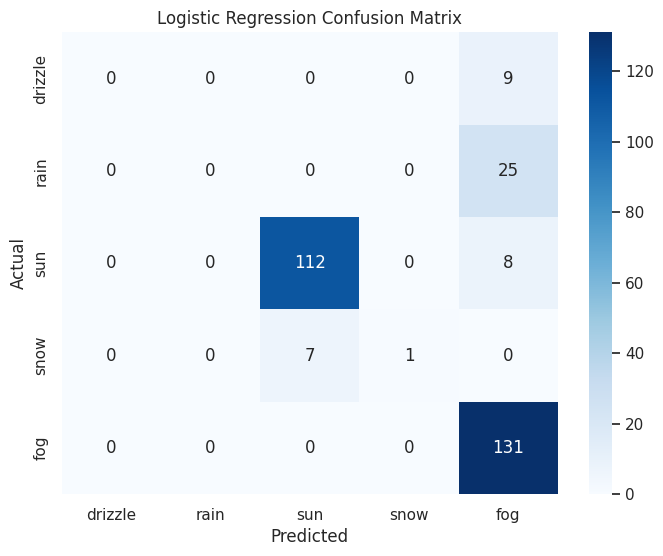

In [50]:
# Logistic Regression prediction
y_pred_lr = lr.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(8,6))
sns.heatmap(
    cm, annot=True, fmt='d', cmap="Blues",
    xticklabels=df['weather'].unique(),
    yticklabels=df['weather'].unique()
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [18]:
# Clustering (KMeans)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

print("Silhouette Score:", silhouette_score(X_scaled, clusters))

Silhouette Score: 0.37869310072479023


In [19]:
#Regression (Temperature Prediction)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X_reg = df[['precipitation','temp_min','wind']]
y_reg = df['temp_max']

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

reg = RandomForestRegressor(random_state=42)
reg.fit(X_train_r, y_train_r)

y_pred_r = reg.predict(X_test_r)
rmse = np.sqrt(mean_squared_error(y_test_r, y_pred_r))

print("RMSE:", round(rmse,2))

RMSE: 3.09


In [52]:
model_accuracy(dtree, 'Decision Tree')
model_accuracy(rf, "Random Forest")
model_accuracy(lr, "Logisitic Regression")

---- Decision Tree ----
Accuracy: 73.04 %
F1 Score: 0.73
---- Random Forest ----
Accuracy: 81.57 %
F1 Score: 0.82
---- Logisitic Regression ----
Accuracy: 83.28 %
F1 Score: 0.83


In [21]:
import joblib

joblib.dump(dtree, "Weather_DecisionTree.pkl")
joblib.dump(le, "Weather_LabelEncoder.pkl")
joblib.dump(scaler, "Weather_Scaler.pkl")

['Weather_Scaler.pkl']

In [53]:
import joblib
joblib.dump(dtree, 'DecisionTree.pkl')

['DecisionTree.pkl']